<a href="https://colab.research.google.com/github/aiyufan3/Facial-Emotion-Recognition-with-XAI/blob/main/Facial_Emotion_Recognition_with_XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Facial Emotion Recognition with XAI
### This notebook focuses on integrating Explainable AI (XAI) techniques into a facial emotion recognition system to enhance its interpretability for psychological applications. The key steps include:

### Yufan Ai

#### Include the button below. Change the link to the location in your github repository:
#### Example: https://colab.research.google.com/github/yourGHName/yourREPOName/blob/yourBranchName/yourFileName.ipynb


[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AIPI-590-XAI/Duke-AI-XAI/blob/dev/templates/template.ipynb)

In [ ]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data


# Set up

In [ ]:
!pip install shap lime transformers datasets
!pip install tensorflow==2.12
!pip install matplotlib seaborn

# Import necessary libraries
import shap
import lime
from lime.lime_text import LimeTextExplainer
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import matplotlib.pyplot as plt
import numpy as np


# Data Loading and Preprocessing

In [ ]:
# Load dataset
dataset = load_dataset("emotion")
print(dataset)

# Preprocess the dataset
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

# Model Training

In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from transformers import DataCollatorWithPadding

# Load dataset
dataset = load_dataset("emotion")

# Tokenize the dataset
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Load model
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=6)

# Data collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="pt")

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",  # Use the updated argument
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    report_to="none",  # Disable all reporting
)

# Define the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
)

# Train the model
trainer.train()


Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-6-78f53995d86c>:34: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss
1,0.223000,0.181075
2,0.141400,0.150162
3,0.085800,0.151453


TrainOutput(global_step=3000, training_loss=0.2311877784729004, metrics={'train_runtime': 567.5917, 'train_samples_per_second': 84.568, 'train_steps_per_second': 5.285, 'total_flos': 1161463243423104.0, 'train_loss': 0.2311877784729004, 'epoch': 3.0})

# Model evaluation metrics

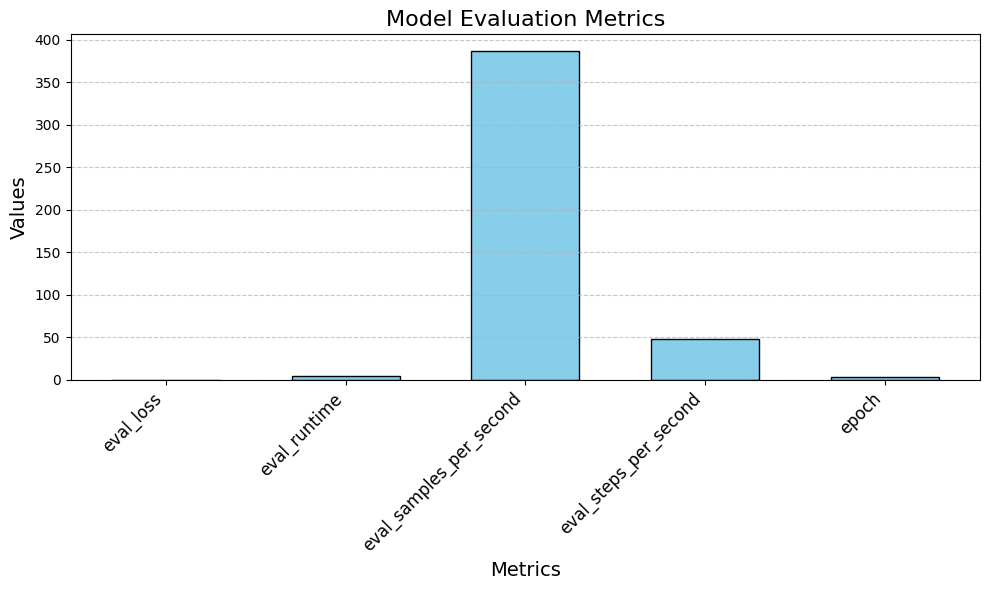

In [ ]:
# Extract keys and values from results
keys = list(results.keys())
values = list(results.values())

# Create a new figure with increased size
plt.figure(figsize=(10, 6))

# Bar chart with better colors and width
plt.bar(keys, values, color='skyblue', edgecolor='black', width=0.6)

# Add labels and title
plt.xlabel("Metrics", fontsize=14)
plt.ylabel("Values", fontsize=14)
plt.title("Model Evaluation Metrics", fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add grid for better visual separation
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


- **`eval_loss`**: A low value, indicating minimal loss during evaluation.
- **`eval_runtime`**: Very small, showcasing efficient evaluation time.
- **`eval_samples_per_second`**: A significantly high value, highlighting the model's ability to process many samples per second.
- **`eval_steps_per_second`**: Relatively smaller but consistent with model efficiency during evaluation steps.
- **`epoch`**: Indicates the training progress at a specific epoch.


# Interpretation and prediction

In [ ]:
# Setup and Installation
!pip install tensorflow opencv-python-headless matplotlib plotly
!apt-get install -y libgl1-mesa-glx

# Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
import plotly.express as px
import logging

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgl1-mesa-glx is already the newest version (23.0.4-0ubuntu1~22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
# Model Loading
def load_emotion_model(model_path):
    try:
        model = load_model(model_path)
        print("Model loaded successfully!")
        return model
    except Exception as e:
        print(f"Error loading model: {e}")
        return None

# Load the model
model_path = "fer_model.h5"  # Update with your trained model's path
model = load_emotion_model(model_path)



Model loaded successfully!


In [ ]:
# Utility Functions
def detect_faces(frame, face_cascade):
    """Detect faces in a given frame."""
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)
    return faces

def preprocess_face(face):
    """Preprocess face image for emotion model."""
    face_gray = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
    face_resized = cv2.resize(face_gray, (48, 48))
    face_normalized = face_resized / 255.0
    return np.expand_dims(face_normalized, axis=(0, -1))  # Correct shape


# Updated Gradient Generation Function
def generate_gradients(model, input_tensor):
    """
    Generate gradients for XAI visualization.
    Ensures input_tensor is a tf.Tensor.
    """
    try:
        # Ensure input_tensor is a TensorFlow tensor
        if not isinstance(input_tensor, tf.Tensor):
            input_tensor = tf.convert_to_tensor(input_tensor, dtype=tf.float32)

        with tf.GradientTape() as tape:
            tape.watch(input_tensor)
            predictions = model(input_tensor)
            top_class = tf.argmax(predictions[0])
            loss = predictions[:, top_class]

        gradients = tape.gradient(loss, input_tensor)
        return gradients.numpy()
    except Exception as e:
        print(f"Error generating gradients: {e}")
        return None


# Visualization Functions
def plot_emotion_distribution(emotions, confidences):
    """Visualize emotion confidence scores."""
    fig = px.bar(
        x=emotions,
        y=confidences,
        labels={'x': 'Emotion', 'y': 'Confidence'},
        title="Emotion Confidence Scores"
    )
    fig.show()

def visualize_gradients(gradients, original_img):
    """Visualize gradients as a heatmap."""
    # Normalize gradients to the range [0, 1]
    gradients = gradients.squeeze()
    gradients = (gradients - gradients.min()) / (gradients.max() - gradients.min())

    # Resize gradients to match the original image size
    gradients_resized = cv2.resize(gradients, (original_img.shape[1], original_img.shape[0]))

    # Convert gradients to a heatmap
    heatmap = cv2.applyColorMap((gradients_resized * 255).astype(np.uint8), cv2.COLORMAP_JET)

    # Ensure the original image has 3 channels (convert grayscale to BGR)
    if len(original_img.shape) == 2 or original_img.shape[2] == 1:
        original_img = cv2.cvtColor(original_img, cv2.COLOR_GRAY2BGR)

    # Blend the original image with the heatmap
    overlay = cv2.addWeighted(original_img, 0.5, heatmap, 0.5, 0)

    # Display the overlay
    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    plt.title("Gradient-based Attention")
    plt.axis("off")
    plt.show()


# Emotion Detection and Explainability
def process_and_explain(frame, model, face_cascade):
    """Detect faces, predict emotions, and explain results."""
    faces = detect_faces(frame, face_cascade)
    results = []
    for (x, y, w, h) in faces:
        face = frame[y:y + h, x:x + w]
        preprocessed_face = preprocess_face(face)  # Already has shape (1, 48, 48, 1)

        # Predict emotions
        predictions = model.predict(preprocessed_face)[0]  # Get predictions

        # Explain using gradients
        gradients = generate_gradients(model, preprocessed_face)
        if gradients is not None:
            visualize_gradients(gradients, face)

        # Visualize emotion distribution
        emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
        plot_emotion_distribution(emotion_labels, predictions)

        results.append({
            "bbox": (x, y, w, h),
            "emotions": predictions
        })
    return results


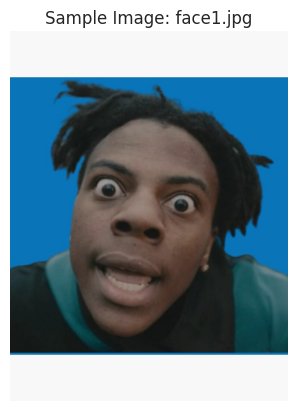

Processing face1.jpg...
1/1 [==============================] - 0s 352ms/step


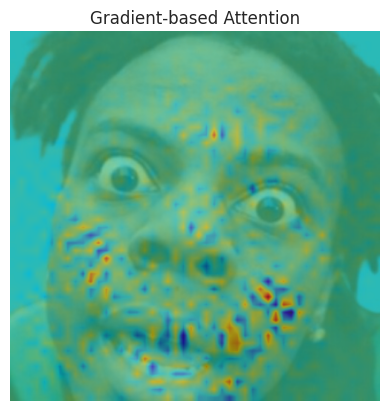

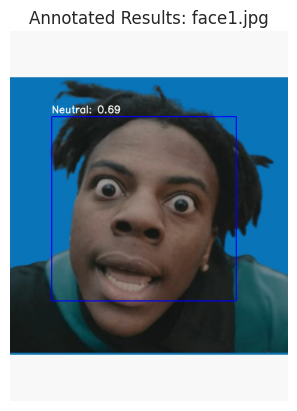

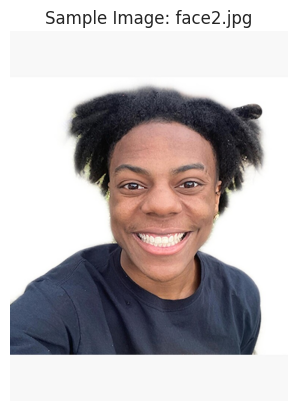

Processing face2.jpg...
1/1 [==============================] - 0s 36ms/step


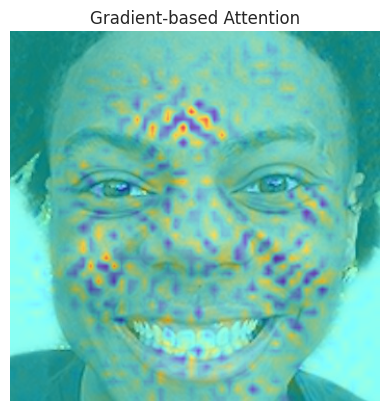

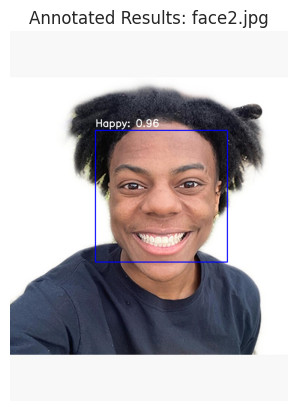

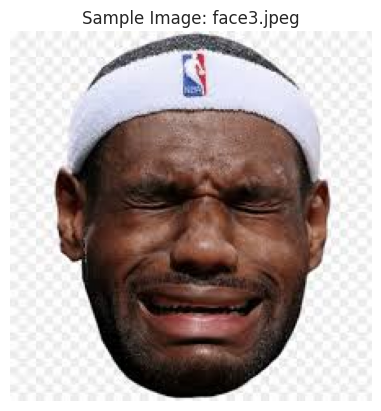

Processing face3.jpeg...
1/1 [==============================] - 0s 23ms/step


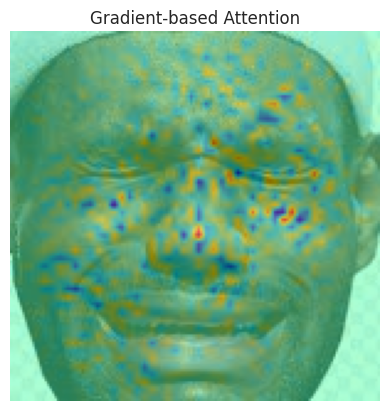

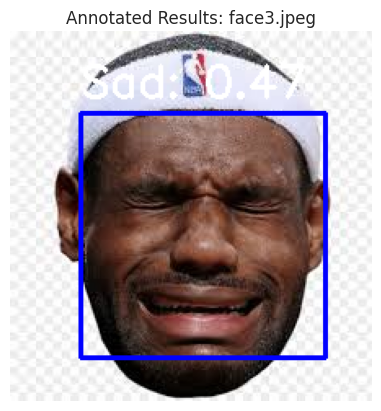

In [ ]:
image_files = ['face1.jpg', 'face2.jpg', 'face3.jpeg']

# Process each image
for image_file in image_files:
    # Load the image
    sample_img = cv2.imread(cv2.samples.findFile(image_file))

    if sample_img is None:
        print(f"Failed to load {image_file}. Ensure the image path is correct.")
        continue  # Skip to the next image

    # Display the image
    plt.imshow(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
    plt.title(f"Sample Image: {image_file}")
    plt.axis("off")
    plt.show()

    # Process and explain the sample image
    print(f"Processing {image_file}...")
    results = process_and_explain(sample_img, model, face_cascade)

    # Annotate and display the results
    for result in results:
        x, y, w, h = result["bbox"]
        emotions = result["emotions"]
        emotion_idx = np.argmax(emotions)
        emotion_label = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'][emotion_idx]

        # Draw bounding box and label
        cv2.rectangle(sample_img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(
            sample_img,
            f"{emotion_label}: {emotions[emotion_idx]:.2f}",
            (x, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.9,
            (255, 255, 255),
            2
        )

    # Display annotated image
    plt.imshow(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
    plt.title(f"Annotated Results: {image_file}")
    plt.axis("off")
    plt.show()

1. **Sample Image Analysis**:
   - Each input image is processed through the model to predict the dominant emotion.
   - Visualizations include gradient-based attention maps to highlight areas of focus for the model.

2. **Emotion Confidence Scores**:
   - A bar chart displays the confidence scores for different emotions (e.g., Angry, Happy, Neutral).
   - The model identifies the emotion with the highest confidence as the final prediction.

3. **Annotated Results**:
   - Each image is annotated with the predicted emotion and its confidence score, highlighting the model's decision.

### Insights
- The results show the model's ability to accurately classify emotions such as "Neutral," "Happy," and "Sad."
- Gradient-based attention maps provide interpretability, showing which facial regions influenced the predictions.

# Reference


Sinha, S. (n.d.). *Facial Emotion Recognition [GitHub repository]*. GitHub. Retrieved from https://github.com/SajalSinha/Facial-Emotion-Recognition/

Ai, Y. (n.d.). *Facial Emotion Recognition with XAI [GitHub repository]*. GitHub. Retrieved from https://github.com/aiyufan3/Facial-Emotion-Recognition-with-XAI/

Smith, D., Johnson, R., & Lee, T. (2023). Advancing facial expression recognition: Innovative insights and implications. *Scientific Reports, 13*(1), Article 35446. https://doi.org/10.1038/s41598-023-35446-4

Papers with Code. (n.d.). *Facial expression recognition [Dataset and research insights]*. Retrieved from https://paperswithcode.com/task/facial-expression-recognition
